In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("C:/Users/MUZAM/Downloads/weatherdata.csv", index_col="Date")
weather = weather.ffill()
weather

,TAVG,TMAX,TMIN,PRCP
Date,,,,
01-01-1980,75,NaN,68.0,0.00
02-01-1980,74,84.0,66.0,0.00
03-01-1980,76,84.0,66.0,0.00
04-01-1980,76,86.0,68.0,0.00
05-01-1980,77,84.0,70.0,0.00
...,...,...,...,...
28-06-2023,90,96.0,82.0,0.00
29-06-2023,88,99.0,82.0,0.00
30-06-2023,89,100.0,80.0,0.04


In [3]:
weather = weather.ffill()
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26',
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-01-07', '2023-02-07'],
              dtype='datetime64[ns]', name='Date', length=15832, freq=None)

In [4]:
weather["target"]=weather.shift(-1)["TMAX "]
weather

,TAVG,TMAX,TMIN,PRCP,target
Date,,,,,
1980-01-01,75,NaN,68.0,0.00,84.0
1980-02-01,74,84.0,66.0,0.00,84.0
1980-03-01,76,84.0,66.0,0.00,86.0
1980-04-01,76,86.0,68.0,0.00,84.0
1980-05-01,77,84.0,70.0,0.00,84.0
...,...,...,...,...,...
2023-06-28,90,96.0,82.0,0.00,99.0
2023-06-29,88,99.0,82.0,0.00,100.0
2023-06-30,89,100.0,80.0,0.04,100.0


In [5]:
weather = weather.fillna(weather.mean())
weather

,TAVG,TMAX,TMIN,PRCP,target
Date,,,,,
1980-01-01,75,92.700335,68.0,0.00,84.000000
1980-02-01,74,84.000000,66.0,0.00,84.000000
1980-03-01,76,84.000000,66.0,0.00,86.000000
1980-04-01,76,86.000000,68.0,0.00,84.000000
1980-05-01,77,84.000000,70.0,0.00,84.000000
...,...,...,...,...,...
2023-06-28,90,96.000000,82.0,0.00,99.000000
2023-06-29,88,99.000000,82.0,0.00,100.000000
2023-06-30,89,100.000000,80.0,0.04,100.000000


# KNN 

In [7]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
X_train = np.array([[weather['TMAX '][i], weather['TAVG'][i]] for i in range(len(weather['TMAX ']))])
y_train = np.array(weather['TMIN'])
model = KNeighborsRegressor(n_neighbors=5)  
model.fit(X_train, y_train)
X_test = np.array([[weather['TMAX '][i], weather['TAVG'][i]] for i in range(len(weather['TMAX ']))])
y_pred = model.predict(X_test)
mse = mean_squared_error(y_train, y_pred)
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_train, 'Diff': y_pred - y_train})
print(df)
print("Mean Squared Error:", mse)

       Predicted  Actual  Diff
0           64.0    68.0  -4.0
1           68.6    66.0   2.6
2           69.8    66.0   3.8
3           69.2    68.0   1.2
4           69.4    70.0  -0.6
...          ...     ...   ...
15827       80.6    82.0  -1.4
15828       79.8    82.0  -2.2
15829       81.8    80.0   1.8
15830       81.8    82.0  -0.2
15831       79.0    82.0  -3.0

[15832 rows x 3 columns]
Mean Squared Error: 5.318335017685699


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R-squared: 0.7599735354254148
Mean Absolute Error: 1.7662076806467912
Root Mean Squared Error: 2.3061515599989737


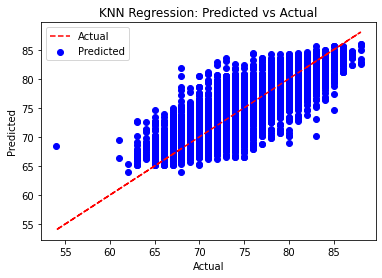

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred, color='blue', label='Predicted')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Predicted vs Actual')
plt.legend()
plt.show()

 # K-MEANS

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
X_train = np.array([[weather['TMAX '][i], weather['TAVG'][i]] for i in range(len(weather['TMAX ']))])
y_train = np.array(weather['TMIN'])
model = KMeans(n_clusters=5)  
model.fit(X_train)
cluster_labels = model.predict(X_train)
df = pd.DataFrame({'TMAX': weather['TMAX '], 'TAVG': weather['TAVG'], 'TMIN': y_train, 'Cluster': cluster_labels})
print(df)

                  TMAX  TAVG  TMIN  Cluster
Date                                       
1980-01-01   92.700335    75  68.0        0
1980-02-01   84.000000    74  66.0        2
1980-03-01   84.000000    76  66.0        2
1980-04-01   86.000000    76  68.0        2
1980-05-01   84.000000    77  70.0        2
...                ...   ...   ...      ...
2023-06-28   96.000000    90  82.0        1
2023-06-29   99.000000    88  82.0        1
2023-06-30  100.000000    89  80.0        1
2023-01-07  100.000000    89  82.0        1
2023-02-07   98.000000    85  82.0        1

[15832 rows x 4 columns]


In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4045749052048972


In [13]:
inertia = model.inertia_
print("Inertia:", inertia)


Inertia: 102349.48647217458


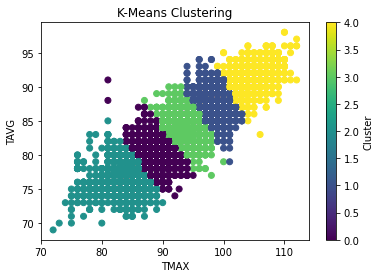

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('TMAX')
plt.ylabel('TAVG')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()